In [32]:
import pandas as pd

In [33]:
file_path = "Resources/shopping_data.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head()

,CustomerID,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,Yes,19.0,15000,39.0
1,2,Yes,21.0,15000,81.0
2,3,No,20.0,16000,6.0
3,4,No,23.0,16000,77.0
4,5,No,31.0,17000,40.0


In [34]:
# list the columns
df_shopping.columns

Index(['CustomerID', 'Card Member', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
#list the datatypes of the columns
df_shopping.dtypes

CustomerID                  int64
Card Member                object
Age                       float64
Annual Income               int64
Spending Score (1-100)    float64
dtype: object

In [36]:
# find null values
for column in df_shopping.columns:
    print(f'Column {column} has {df_shopping[column].isnull().sum()} null values')

Column CustomerID has 0 null values
Column Card Member has 2 null values
Column Age has 2 null values
Column Annual Income has 0 null values
Column Spending Score (1-100) has 1 null values


In [37]:
# drop null values
df_shopping = df_shopping.dropna()

In [38]:
# find duplicate entries
print(f'Duplicate entries: {df_shopping.duplicated().sum()}')

Duplicate entries: 0


In [39]:
# drop useless column, customer id doesnt tell us anything
df_shopping.drop(columns=["CustomerID"], inplace=True)
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,Yes,19.0,15000,39.0
1,Yes,21.0,15000,81.0
2,No,20.0,16000,6.0
3,No,23.0,16000,77.0
4,No,31.0,17000,40.0


In [40]:
from sklearn.preprocessing import LabelEncoder
# create instance of label encoder
le = LabelEncoder()
# transform the card member colum
df_shopping["Card Member"] = le.fit_transform(df_shopping["Card Member"])
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15000,39.0
1,1,21.0,15000,81.0
2,0,20.0,16000,6.0
3,0,23.0,16000,77.0
4,0,31.0,17000,40.0


In [41]:
# we'll first import the StandardScaler module and create an instance of it as data_scaler
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_shopping = data_scaler.fit_transform(df_shopping)
scaled_shopping[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [42]:
df_shopping["Annual Income"] = df_shopping["Annual Income"] / 1000
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [43]:
# remove spaces in column names
df_shopping.columns = df_shopping.columns.str.replace(" ", "_")

In [44]:
df_shopping.head()

,Card_Member,Age,Annual_Income,Spending_Score_(1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [45]:
# saving the data
save_path = "Resources/"
df_shopping.to_csv(save_path + "cleaned_shopping_data.csv", index=False)


# k means clustering

## KElbowviz method of finding K

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import hvplot.pandas
import plotly.express as px


In [47]:
# instantiate kmeans model
kmmodel = KMeans()
# instantiate visualizer with node range from 4-11 (4-12 end point exclusive)
visualizer = KElbowVisualizer(kmmodel, k=(1,12))

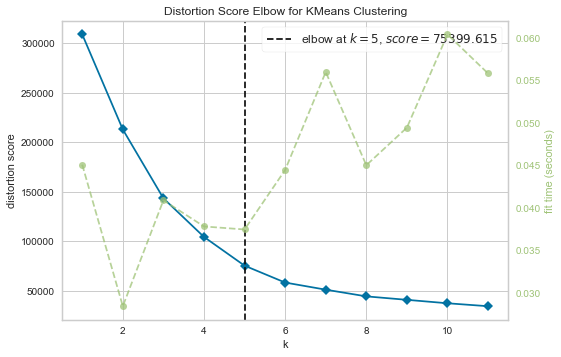

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# fit the data to the visualizer
visualizer.fit(df_shopping)
# finalize and render the figure
visualizer.show()

In [49]:
## visual way of finding K

In [50]:

model = KMeans(n_clusters=3, random_state=5)
model

KMeans(n_clusters=3, random_state=5)

In [51]:
#plot the data
df_shopping.hvplot.scatter(x="Annual_Income", y="Spending_Score_(1-100)")

:Scatter   [Annual_Income]   (Spending_Score_(1-100))

In [52]:
# Function to cluster and plot dataset
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    # Fitting model
    model.fit(df)
    # Add a new class column to df_iris
    df["class"] = model.labels_
    

In [57]:
test_cluster_amount(df_shopping, 2)
df_shopping.hvplot.scatter(x="Annual_Income", y="Spending_Score_(1-100)", by="class")

:NdOverlay   [class]
   :Scatter   [Annual_Income]   (Spending_Score_(1-100))

In [67]:
fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [68]:
test_cluster_amount(df_shopping, 3)
# df_shopping.hvplot.scatter(x="Annual_Income", y="Spending_Score_(1-100)", by="class")

fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [63]:
test_cluster_amount(df_shopping, 4)
# df_shopping.hvplot.scatter(x="Annual_Income", y="Spending_Score_(1-100)", by="class")

fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [64]:
test_cluster_amount(df_shopping, 5)

fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [65]:
test_cluster_amount(df_shopping, 6)

fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [66]:
test_cluster_amount(df_shopping, 7)

fig = px.scatter_3d(
    df_shopping,
    x="Annual_Income",
    y="Spending_Score_(1-100)",
    z="Age",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [69]:
inertia = []
k = list(range(1, 11))
# Calculate the inertia for the range of K values
for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(df_shopping)
   inertia.append(km.inertia_)


In [70]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [72]:
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()
    
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [73]:
five_clusters = get_clusters(5, df_shopping)
five_clusters.head()

,Card_Member,Age,Annual_Income,Spending_Score_(1-100),class
0,1,19.0,15.0,39.0,0
1,1,21.0,15.0,81.0,4
2,0,20.0,16.0,6.0,0
3,0,23.0,16.0,77.0,4
4,0,31.0,17.0,40.0,0


In [74]:
six_clusters = get_clusters(6, df_shopping)
five_clusters.head()

,Card_Member,Age,Annual_Income,Spending_Score_(1-100),class
0,1,19.0,15.0,39.0,0
1,1,21.0,15.0,81.0,4
2,0,20.0,16.0,6.0,0
3,0,23.0,16.0,77.0,4
4,0,31.0,17.0,40.0,0
